<a href="https://colab.research.google.com/github/JakubPac/kurs_data_science/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets
sns.set()

In [3]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
images = digits.images
labels = digits.target

In [7]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

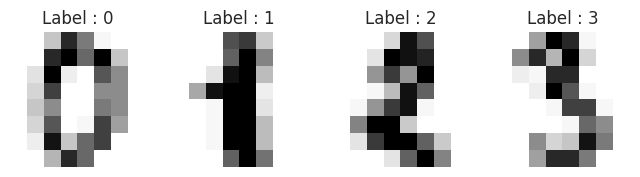

In [10]:
plt.figure(figsize = (8,6))
for index, (image,label) in enumerate(list(zip(images, labels))[:4]):
  plt.subplot(2,4,index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = 'Greys')
  plt.title(f'Label : {index}')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

X_train = X_train.reshape(X_train.shape[0], -1)

X_test = X_test.reshape(X_test.shape[0], -1)

In [12]:
X_train[0]

array([ 0.,  0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  1., 15., 16.,
       16.,  2.,  0.,  0.,  2., 13., 16., 16., 16.,  0.,  0.,  0.,  8.,
       16., 16., 16., 16.,  0.,  0.,  0.,  2.,  7.,  8., 16., 16.,  1.,
        0.,  0.,  0.,  0.,  4., 16., 16.,  0.,  0.,  0.,  0.,  0.,  4.,
       16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15.,  4.,  0.])

In [13]:
X_test[0]

array([ 0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.,  1., 11., 12.,  7.,
        0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16., 15.,  8.,  4.,  0.,
        0.,  0.,  4., 16., 16., 13., 16.,  6.,  0.,  0.,  0.,  7., 16.,
        7., 13., 14.,  0.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.])

In [14]:
from sklearn.svm import SVC
model = SVC(gamma = 0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [16]:
y_pred = model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        45
           2       0.98      1.00      0.99        47
           3       1.00      0.97      0.99        36
           4       1.00      0.98      0.99        51
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        33
           7       0.98      1.00      0.99        46
           8       0.98      1.00      0.99        48
           9       1.00      0.98      0.99        51

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 50]])

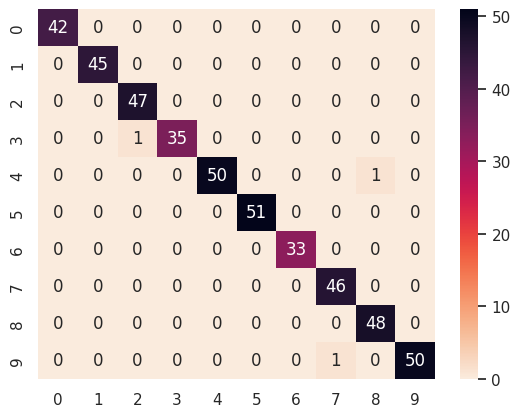

In [20]:
_ = sns.heatmap(cm, annot = True, cmap = sns.cm.rocket_r)

In [21]:
results = pd.DataFrame(data = {'y_pred':y_pred, 'y_test' : y_test})
results.head(10)

,y_pred,y_test
0,6,6
1,1,1
2,7,7
3,1,1
4,5,5
5,6,6
6,8,8
7,4,4
8,8,8
9,0,0


In [22]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[85, 136, 227]

In [25]:
results.loc[errors_idxs, :]

,y_pred,y_test
85,8,4
136,7,9
227,2,3


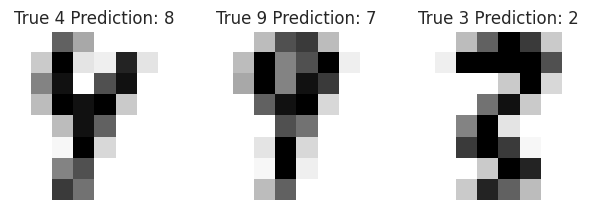

In [26]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")
